<!-- Describing the dataset 1 -->

In [9]:
import csv
import os

dataset_path_1 = '/Users/patron/Developer/SQL Project/dataset/US_flights_2023.csv'

# Check if the file exists before attempting to open
if not os.path.exists(dataset_path_1):
    print(f"Error: The file '{dataset_path_1}' was not found. Please ensure the path is correct.")
else:
    try:
        with open(dataset_path_1, 'r') as file:
            reader = csv.reader(file)

            # Read the header row
            headers = next(reader)

            # Count the remaining data rows
            row_count = sum(1 for row in reader)

            # Add 1 for the header row to get total rows
            total_rows = row_count + 1

            # Number of columns is the length of the headers
            total_columns = len(headers)

            print("\n--- Dataset Description (using csv module) ---")
            print(f"Total Number of Rows (including header): {total_rows}")
            print(f"Total Number of Data Rows ( excluding header): {row_count}")
            print(f"Total Number of Columns: {total_columns}")
            print("Field Names (Columns):")
            for i, header in enumerate(headers):
                print(f"  {i+1}. {header}")
            print(f"Dataset Dimensions (Rows, Columns): ({total_rows}, {total_columns})")

    except Exception as e:
        print(f"An error occurred while reading the dataset with csv module: {e}")


--- Dataset Description (using csv module) ---
Total Number of Rows (including header): 6743405
Total Number of Data Rows ( excluding header): 6743404
Total Number of Columns: 24
Field Names (Columns):
  1. FlightDate
  2. Day_Of_Week
  3. Airline
  4. Tail_Number
  5. Dep_Airport
  6. Dep_CityName
  7. DepTime_label
  8. Dep_Delay
  9. Dep_Delay_Tag
  10. Dep_Delay_Type
  11. Arr_Airport
  12. Arr_CityName
  13. Arr_Delay
  14. Arr_Delay_Type
  15. Flight_Duration
  16. Distance_type
  17. Delay_Carrier
  18. Delay_Weather
  19. Delay_NAS
  20. Delay_Security
  21. Delay_LastAircraft
  22. Manufacturer
  23. Model
  24. Aicraft_age
Dataset Dimensions (Rows, Columns): (6743405, 24)


<!-- Describing dataset 2 -->

In [10]:
dataset_path_2 = '/Users/patron/Developer/SQL Project/dataset/weather_meteo_by_airport.csv'

# Check if the file exists before attempting to open
if not os.path.exists(dataset_path_1):
    print(f"Error: The file '{dataset_path_2}' was not found. Please ensure the path is correct.")
else:
    try:
        with open(dataset_path_2, 'r') as file:
            reader = csv.reader(file)

            # Read the header row
            headers = next(reader)

            # Count the remaining data rows
            row_count = sum(1 for row in reader)

            # Add 1 for the header row to get total rows
            total_rows = row_count + 1

            # Number of columns is the length of the headers
            total_columns = len(headers)

            print("\n--- Dataset Description (using csv module) ---")
            print(f"Total Number of Rows (including header): {total_rows}")
            print(f"Total Number of Data Rows (excluding header): {row_count}")
            print(f"Total Number of Columns: {total_columns}")
            print("Field Names (Columns):")
            for i, header in enumerate(headers):
                print(f"  {i+1}. {header}")
            print(f"Dataset Dimensions (Rows, Columns): ({total_rows}, {total_columns})")

    except Exception as e:
        print(f"An error occurred while reading the dataset with csv module: {e}")


--- Dataset Description (using csv module) ---
Total Number of Rows (including header): 132861
Total Number of Data Rows (excluding header): 132860
Total Number of Columns: 10
Field Names (Columns):
  1. time
  2. tavg
  3. tmin
  4. tmax
  5. prcp
  6. snow
  7. wdir
  8. wspd
  9. pres
  10. airport_id
Dataset Dimensions (Rows, Columns): (132861, 10)


<!-- Loading .env variables -->

In [12]:
import os, psycopg2
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

In [13]:
conn = psycopg2.connect(
    dbname=os.getenv("POSTGRES_DB"),
    user=os.getenv("POSTGRES_USER"),
    password=os.getenv("POSTGRES_PASSWORD"),
    host=os.getenv("POSTGRES_HOST"),
    port=os.getenv("POSTGRES_PORT"),
    # sslmode=os.getenv("PGSSLMODE")
)

<!-- Creating tables -->

In [14]:
# import psycopg2
# from psycopg2 import sql

# dataset_path_1 = '/content/drive/MyDrive/Data Set/US_flights_2023.csv'
# dataset_path_2 = '/content/drive/MyDrive/Data Set/weather_meteo_by_airport.csv'

cur = conn.cursor()

# ---------- 1) CREATE TABLES ----------

ddl = """
-- STAGING TABLES
CREATE TABLE IF NOT EXISTS flights_raw (
    FlightDate       TEXT,
    Day_Of_Week      TEXT,
    Airline          TEXT,
    Tail_Number      TEXT,
    Dep_Airport      TEXT,
    Dep_CityName     TEXT,
    DepTime_label    TEXT,
    Dep_Delay        TEXT,
    Dep_Delay_Tag    TEXT,
    Dep_Delay_Type   TEXT,
    Arr_Airport      TEXT,
    Arr_CityName     TEXT,
    Arr_Delay        TEXT,
    Arr_Delay_Type   TEXT,
    Flight_Duration  TEXT,
    Distance_type    TEXT,
    Delay_Carrier    TEXT,
    Delay_Weather    TEXT,
    Delay_NAS        TEXT,
    Delay_Security   TEXT,
    Delay_LastAircraft TEXT,
    Manufacturer     TEXT,
    Model            TEXT,
    Aicraft_age      TEXT
);

CREATE TABLE IF NOT EXISTS weather_raw (
    time       TEXT,
    tavg       TEXT,
    tmin       TEXT,
    tmax       TEXT,
    prcp       TEXT,
    snow       TEXT,
    wdir       TEXT,
    wspd       TEXT,
    pres       TEXT,
    airport_id TEXT
);

-- DIMENSIONS & FACTS
CREATE TABLE IF NOT EXISTS airports (
    airport_code   TEXT PRIMARY KEY,
    city_name      TEXT,
    state          TEXT,
    country        TEXT
);

CREATE TABLE IF NOT EXISTS airlines (
    airline_code   TEXT PRIMARY KEY
);

CREATE TABLE IF NOT EXISTS aircrafts (
    tail_number    TEXT PRIMARY KEY,
    manufacturer   TEXT,
    model          TEXT,
    aircraft_age   NUMERIC
);

CREATE TABLE IF NOT EXISTS flights (
    flight_id          BIGSERIAL PRIMARY KEY,
    flight_date        DATE NOT NULL,
    day_of_week        SMALLINT,
    airline_code       TEXT REFERENCES airlines(airline_code),
    tail_number        TEXT REFERENCES aircrafts(tail_number),
    dep_airport_code   TEXT REFERENCES airports(airport_code),
    arr_airport_code   TEXT REFERENCES airports(airport_code),
    dep_cityname       TEXT,
    arr_cityname       TEXT,
    dep_time_label     TEXT,
    dep_delay          NUMERIC,
    dep_delay_tag      TEXT,
    dep_delay_type     TEXT,
    arr_delay          NUMERIC,
    arr_delay_type     TEXT,
    flight_duration    NUMERIC,
    distance_type      TEXT,
    delay_carrier      NUMERIC,
    delay_weather      NUMERIC,
    delay_nas          NUMERIC,
    delay_security     NUMERIC,
    delay_lastaircraft NUMERIC
);

CREATE TABLE IF NOT EXISTS weather_observations (
    airport_code   TEXT REFERENCES airports(airport_code),
    obs_date       DATE,
    tavg           NUMERIC,
    tmin           NUMERIC,
    tmax           NUMERIC,
    prcp           NUMERIC,
    snow           NUMERIC,
    wdir           NUMERIC,
    wspd           NUMERIC,
    pres           NUMERIC,
    PRIMARY KEY (airport_code, obs_date)
);
"""

cur.execute(ddl)
conn.commit()
print("Tables created.")


Tables created.


<!-- Loading the raw data first -->

In [15]:
# Load flights_raw
with open(dataset_path_1, 'r') as f:
    cur.copy_expert(
        """
        COPY flights_raw
        FROM STDIN
        WITH (FORMAT csv, HEADER true)
        """,
        f
    )
conn.commit()
print("flights_raw loaded.")

# Load weather_raw
with open(dataset_path_2, 'r') as f:
    cur.copy_expert(
        """
        COPY weather_raw
        FROM STDIN
        WITH (FORMAT csv, HEADER true)
        """,
        f
    )
conn.commit()
print("weather_raw loaded.")

flights_raw loaded.
weather_raw loaded.


In [16]:
# Airports: from departure + arrival + weather
cur.execute("""
    INSERT INTO airports (airport_code, city_name)
    SELECT DISTINCT Dep_Airport, Dep_CityName
    FROM flights_raw
    WHERE Dep_Airport IS NOT NULL

    UNION

    SELECT DISTINCT Arr_Airport, Arr_CityName
    FROM flights_raw
    WHERE Arr_Airport IS NOT NULL

    UNION

    SELECT DISTINCT airport_id, NULL
    FROM weather_raw
    WHERE airport_id IS NOT NULL
    ON CONFLICT (airport_code) DO NOTHING;
""")

# Airlines
cur.execute("""
    INSERT INTO airlines (airline_code)
    SELECT DISTINCT Airline
    FROM flights_raw
    WHERE Airline IS NOT NULL
    ON CONFLICT (airline_code) DO NOTHING;
""")

# Aircrafts
cur.execute("""
    INSERT INTO aircrafts (tail_number, manufacturer, model, aircraft_age)
    SELECT DISTINCT
        Tail_Number,
        Manufacturer,
        Model,
        NULLIF(Aicraft_age, '')::NUMERIC
    FROM flights_raw
    WHERE Tail_Number IS NOT NULL
    ON CONFLICT (tail_number) DO NOTHING;
""")

conn.commit()
print("Dimension tables populated.")


Dimension tables populated.


<!-- Inserting the flight data -->

In [17]:
cur.execute("""
    INSERT INTO flights (
        flight_date,
        day_of_week,
        airline_code,
        tail_number,
        dep_airport_code,
        arr_airport_code,
        dep_cityname,
        arr_cityname,
        dep_time_label,
        dep_delay,
        dep_delay_tag,
        dep_delay_type,
        arr_delay,
        arr_delay_type,
        flight_duration,
        distance_type,
        delay_carrier,
        delay_weather,
        delay_nas,
        delay_security,
        delay_lastaircraft
    )
    SELECT
        FlightDate::DATE,
        NULLIF(Day_Of_Week, '')::SMALLINT,
        Airline,
        Tail_Number,
        Dep_Airport,
        Arr_Airport,
        Dep_CityName,
        Arr_CityName,
        DepTime_label,
        NULLIF(Dep_Delay, '')::NUMERIC,
        Dep_Delay_Tag,
        Dep_Delay_Type,
        NULLIF(Arr_Delay, '')::NUMERIC,
        Arr_Delay_Type,
        NULLIF(Flight_Duration, '')::NUMERIC,
        Distance_type,
        NULLIF(Delay_Carrier, '')::NUMERIC,
        NULLIF(Delay_Weather, '')::NUMERIC,
        NULLIF(Delay_NAS, '')::NUMERIC,
        NULLIF(Delay_Security, '')::NUMERIC,
        NULLIF(Delay_LastAircraft, '')::NUMERIC
    FROM flights_raw;
""")

conn.commit()
print("flights table populated.")


flights table populated.


<!-- Inserting weather data -->

In [18]:
cur.execute("""
    INSERT INTO weather_observations (
        airport_code,
        obs_date,
        tavg,
        tmin,
        tmax,
        prcp,
        snow,
        wdir,
        wspd,
        pres
    )
    SELECT
        airport_id,
        time::DATE,
        NULLIF(tavg, '')::NUMERIC,
        NULLIF(tmin, '')::NUMERIC,
        NULLIF(tmax, '')::NUMERIC,
        NULLIF(prcp, '')::NUMERIC,
        NULLIF(snow, '')::NUMERIC,
        NULLIF(wdir, '')::NUMERIC,
        NULLIF(wspd, '')::NUMERIC,
        NULLIF(pres, '')::NUMERIC
    FROM weather_raw
    WHERE airport_id IS NOT NULL
    ON CONFLICT (airport_code, obs_date) DO NOTHING;
""")

conn.commit()
print("weather_observations table populated.")


weather_observations table populated.


<!-- Indexing the data -->

In [19]:
cur = conn.cursor()

indexes_sql = """
-- Indexes to speed up common lookups and joins

-- Flights by departure airport + date
CREATE INDEX IF NOT EXISTS idx_flights_dep_airport_date
    ON flights (dep_airport_code, flight_date);

-- Flights by arrival airport + date
CREATE INDEX IF NOT EXISTS idx_flights_arr_airport_date
    ON flights (arr_airport_code, flight_date);

-- Flights by airline
CREATE INDEX IF NOT EXISTS idx_flights_airline
    ON flights (airline_code);

-- Flights by weather-related delay
CREATE INDEX IF NOT EXISTS idx_flights_delay_weather
    ON flights (delay_weather);

-- Weather by airport + date (already PK but index helps joins)
CREATE INDEX IF NOT EXISTS idx_weather_airport_date
    ON weather_observations (airport_code, obs_date);
"""

cur.execute(indexes_sql)
conn.commit()
print("Indexes created.")


Indexes created.


<!-- Creating views -->

In [24]:
cur = conn.cursor()

views_sql = """
-- Drop old views if they exist
DROP VIEW IF EXISTS vw_airport_daily_delay_weather CASCADE;
DROP VIEW IF EXISTS vw_airline_delay_summary CASCADE;

-- View 1: airport + date level delay & weather summary
CREATE OR REPLACE VIEW vw_airport_daily_delay_weather AS
SELECT
    f.dep_airport_code AS airport_code,
    f.flight_date,
    AVG(f.dep_delay) AS avg_dep_delay,
    AVG(f.arr_delay) AS avg_arr_delay,
    SUM(CASE WHEN f.delay_weather > 0 THEN 1 ELSE 0 END) AS weather_delay_flights,
    COUNT(*) AS total_flights,
    w.tavg,
    w.prcp,
    w.snow,
    w.wspd
FROM flights f
LEFT JOIN weather_observations w
       ON w.airport_code = f.dep_airport_code
      AND w.obs_date = f.flight_date
GROUP BY
    f.dep_airport_code, f.flight_date,
    w.tavg, w.prcp, w.snow, w.wspd;

-- View 2: airline-level delay summary (only airline_code)
CREATE OR REPLACE VIEW vw_airline_delay_summary AS
SELECT
    f.airline_code,
    AVG(f.dep_delay) AS avg_dep_delay,
    AVG(f.arr_delay) AS avg_arr_delay,
    COUNT(*) AS total_flights
FROM flights f
GROUP BY
    f.airline_code;
"""

cur.execute(views_sql)
conn.commit()
print("Views created successfully.")


Views created successfully.


In [25]:
audit_sql = """
CREATE TABLE IF NOT EXISTS flight_delay_anomalies (
    anomaly_id   BIGSERIAL PRIMARY KEY,
    flight_id    BIGINT REFERENCES flights(flight_id),
    created_at   TIMESTAMPTZ DEFAULT NOW(),
    dep_delay    NUMERIC,
    arr_delay    NUMERIC,
    note         TEXT
);
"""

cur.execute(audit_sql)
conn.commit()
print("Audit table created.")



Audit table created.


<!-- Creating triggure function -->

In [26]:
trigger_fn_sql = """
CREATE OR REPLACE FUNCTION log_delay_anomalies()
RETURNS TRIGGER AS $$
BEGIN
    -- Departure delay anomaly
    IF NEW.dep_delay IS NOT NULL
       AND (NEW.dep_delay < -240 OR NEW.dep_delay > 1440) THEN
        INSERT INTO flight_delay_anomalies (flight_id, dep_delay, arr_delay, note)
        VALUES (NEW.flight_id, NEW.dep_delay, NEW.arr_delay,
                'Departure delay out of expected range [-240, 1440] minutes');
    END IF;

    -- Arrival delay anomaly
    IF NEW.arr_delay IS NOT NULL
       AND (NEW.arr_delay < -240 OR NEW.arr_delay > 1440) THEN
        INSERT INTO flight_delay_anomalies (flight_id, dep_delay, arr_delay, note)
        VALUES (NEW.flight_id, NEW.dep_delay, NEW.arr_delay,
                'Arrival delay out of expected range [-240, 1440] minutes');
    END IF;

    RETURN NEW;
END;
$$ LANGUAGE plpgsql;
"""

cur.execute(trigger_fn_sql)
conn.commit()
print("Trigger function created.")


Trigger function created.


In [27]:
trigger_sql = """
DROP TRIGGER IF EXISTS trg_log_delay_anomalies ON flights;

CREATE TRIGGER trg_log_delay_anomalies
AFTER INSERT OR UPDATE ON flights
FOR EACH ROW
EXECUTE FUNCTION log_delay_anomalies();
"""

cur.execute(trigger_sql)
conn.commit()
print("Trigger created.")


Trigger created.


<!-- Creating stored producer -->

In [28]:
fn_sql = """
CREATE OR REPLACE FUNCTION airport_delay_summary(
    p_airport TEXT,
    p_start   DATE,
    p_end     DATE
)
RETURNS TABLE (
    flight_date        DATE,
    avg_dep_delay      NUMERIC,
    avg_arr_delay      NUMERIC,
    weather_delay_pct  NUMERIC
) AS $$
BEGIN
    RETURN QUERY
    SELECT
        f.flight_date,
        AVG(f.dep_delay) AS avg_dep_delay,
        AVG(f.arr_delay) AS avg_arr_delay,
        100.0 * SUM(CASE WHEN f.delay_weather > 0 THEN 1 ELSE 0 END)::NUMERIC
              / NULLIF(COUNT(*), 0) AS weather_delay_pct
    FROM flights f
    WHERE f.dep_airport_code = p_airport
      AND f.flight_date BETWEEN p_start AND p_end
    GROUP BY f.flight_date
    ORDER BY f.flight_date;
END;
$$ LANGUAGE plpgsql;
"""

cur.execute(fn_sql)
conn.commit()
print("Stored function created.")


Stored function created.


<!-- Helper function -->

In [29]:
import pandas as pd

def run_query(query, params=None):
    """
    Helper to run a SQL query using psycopg2 and return a pandas DataFrame.
    """
    with conn.cursor() as cur:
        cur.execute(query, params or ())
        cols = [desc[0] for desc in cur.description]
        rows = cur.fetchall()
    df = pd.DataFrame(rows, columns=cols)
    return df


<!-- 1) Overall delay statistics (high-level sanity check) -->

In [30]:
query = """
SELECT
    COUNT(*) AS total_flights,
    AVG(dep_delay) AS avg_dep_delay,
    AVG(arr_delay) AS avg_arr_delay,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY dep_delay) AS median_dep_delay,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY arr_delay) AS median_arr_delay
FROM flights;
"""

df_overall = run_query(query)
df_overall


,total_flights,avg_dep_delay,avg_arr_delay,median_dep_delay,median_arr_delay
0,6743404,12.2009866233730027,6.6271515098309400,-2.0,-6.0


<!-- 2) Top 10 departure airports by average delay -->

In [31]:
query = """
SELECT
    dep_airport_code AS airport_code,
    AVG(dep_delay) AS avg_dep_delay,
    COUNT(*) AS num_flights
FROM flights
GROUP BY dep_airport_code
HAVING COUNT(*) > 1000  -- ignore tiny airports
ORDER BY avg_dep_delay DESC
LIMIT 10;
"""

df_airport_delay = run_query(query)
df_airport_delay


,airport_code,avg_dep_delay,num_flights
0,MVY,27.8575367647058824,1088
1,BQN,25.4238246730293390,2829
2,ASE,22.8030453492221119,6042
3,FLL,22.7722811686170152,87933
4,SJU,20.8772137690197057,32072
5,ACK,20.2841133816743573,1517
6,ORH,19.9149232914923291,1434
7,MCO,19.5530195370908147,161846
8,TTN,19.0508788159111933,2162
9,MIA,18.8021128778819832,101189


Matplotlib is building the font cache; this may take a moment.


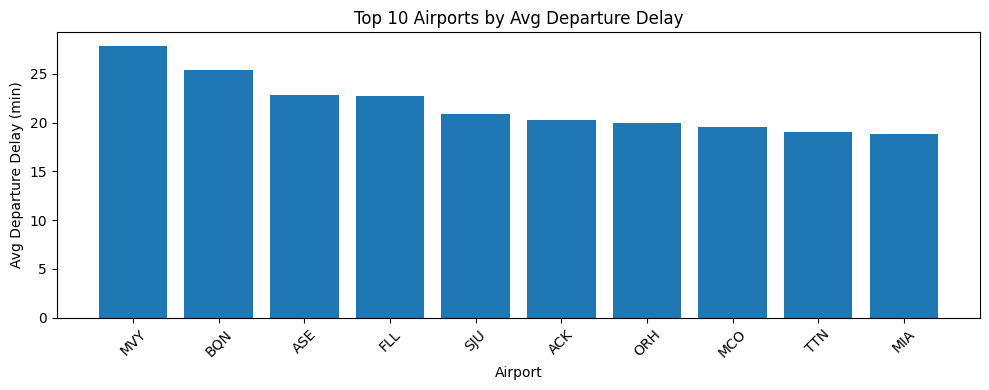

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.bar(df_airport_delay["airport_code"], df_airport_delay["avg_dep_delay"])
plt.xlabel("Airport")
plt.ylabel("Avg Departure Delay (min)")
plt.title("Top 10 Airports by Avg Departure Delay")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<!-- 3) Airline performance: average delays per airline -->

In [33]:
query = """
SELECT
    airline_code,
    AVG(dep_delay) AS avg_dep_delay,
    AVG(arr_delay) AS avg_arr_delay,
    COUNT(*) AS total_flights
FROM flights
GROUP BY airline_code
HAVING COUNT(*) > 1000
ORDER BY avg_dep_delay DESC;
"""

df_airline = run_query(query)
df_airline


,airline_code,avg_dep_delay,avg_arr_delay,total_flights
0,JetBlue Airways,24.2705074370602617,18.4703917287199298,267915
1,Frontier Airlines Inc.,22.1582564179431451,18.1901602107702685,173459
2,Spirit Air Lines,19.5407243140497145,14.6593042752609740,258838
3,American Airlines Inc.,17.4366796040764694,12.3024757073372569,928058
4,Allegiant Air,15.3855538562377103,14.1394363119947564,114425
5,United Air Lines Inc.,12.4950752188791609,6.3284340140438203,720032
6,Southwest Airlines Co.,11.6891590289592595,5.8049637006609730,1421238
7,Delta Air Lines Inc,10.2408228332738910,2.4064697290969247,972931
8,Hawaiian Airlines Inc.,9.5899526564965807,9.7686931690087924,79842
9,Skywest Airlines Inc.,8.7686223135362128,4.4703870433067965,664861


<!-- 4) Weather impact: delays vs precipitation (using the view) -->

In [40]:
query = """
SELECT
    CASE
        WHEN prcp IS NULL THEN 'No data'
        WHEN prcp = 0 THEN '0 mm'
        WHEN prcp > 0 AND prcp <= 5 THEN '0-5 mm'
        WHEN prcp > 5 AND prcp <= 10 THEN '5-10 mm'
        ELSE '>10 mm'
    END AS prcp_bucket,
    AVG(avg_dep_delay) AS avg_dep_delay,
    AVG(avg_arr_delay) AS avg_arr_delay,
    COUNT(*) AS num_airport_days
FROM vw_airport_daily_delay_weather
GROUP BY prcp_bucket
ORDER BY
    CASE prcp_bucket
        WHEN 'No data' THEN 1
        WHEN '0 mm' THEN 2
        WHEN '0-5 mm' THEN 3
        WHEN '5-10 mm' THEN 4
        ELSE 5
    END;
"""

df_prcp = run_query(query)
df_prcp


UndefinedColumn: column "prcp_bucket" does not exist
LINE 16:     CASE prcp_bucket
                  ^


In [38]:
query = """
SELECT
    CASE
        WHEN wspd IS NULL THEN 'No data'
        WHEN wspd < 5 THEN '<5 m/s'
        WHEN wspd >= 5 AND wspd < 10 THEN '5-10 m/s'
        WHEN wspd >= 10 AND wspd < 15 THEN '10-15 m/s'
        ELSE '>=15 m/s'
    END AS wind_bucket,
    AVG(avg_dep_delay) AS avg_dep_delay,
    COUNT(*) AS num_airport_days
FROM vw_airport_daily_delay_weather
GROUP BY wind_bucket
ORDER BY
    CASE wind_bucket
        WHEN 'No data' THEN 1
        WHEN '<5 m/s' THEN 2
        WHEN '5-10 m/s' THEN 3
        WHEN '10-15 m/s' THEN 4
        ELSE 5
    END;
"""

df_wind = run_query(query)
df_wind


UndefinedColumn: column "wind_bucket" does not exist
LINE 15:     CASE wind_bucket
                  ^


In [39]:
conn.rollback()
print("Rolled back the failed transaction. You can run queries again.")


Rolled back the failed transaction. You can run queries again.
